## setting

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## 정규방정식

### multipleregression p54

In [3]:
import numpy as np

X = 2 * np.random.rand(100,1) # 2를 넘지않는 random 숫자 100개의 벡터를 만듦.
y = 4 + 3 * X + np.random.randn(100,1) # y = 3x +4 + e

In [4]:
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

In [5]:
X_b = np.c_[np.ones((100,1)), X] # 앞에 1을 붙임. 왜??????? 역행렬을 구하기 위해선가?
print(X_b)

[[1.         0.74908024]
 [1.         1.90142861]
 [1.         1.46398788]
 [1.         1.19731697]
 [1.         0.31203728]
 [1.         0.31198904]
 [1.         0.11616722]
 [1.         1.73235229]
 [1.         1.20223002]
 [1.         1.41614516]
 [1.         0.04116899]
 [1.         1.9398197 ]
 [1.         1.66488528]
 [1.         0.42467822]
 [1.         0.36364993]
 [1.         0.36680902]
 [1.         0.60848449]
 [1.         1.04951286]
 [1.         0.86389004]
 [1.         0.58245828]
 [1.         1.22370579]
 [1.         0.27898772]
 [1.         0.5842893 ]
 [1.         0.73272369]
 [1.         0.91213997]
 [1.         1.57035192]
 [1.         0.39934756]
 [1.         1.02846888]
 [1.         1.18482914]
 [1.         0.09290083]
 [1.         1.2150897 ]
 [1.         0.34104825]
 [1.         0.13010319]
 [1.         1.89777107]
 [1.         1.93126407]
 [1.         1.6167947 ]
 [1.         0.60922754]
 [1.         0.19534423]
 [1.         1.36846605]
 [1.         0.88030499]


In [6]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # 그냥 1 안붙인 x로 계산할 경우 하나의 세타만 나옴. 세타의 갯수에 따라 1을 앞에 붙여주는듯?

In [7]:
theta_best #4,3과 비슷하나 조금 차이. 노이즈 때문임.

array([[4.21509616],
       [2.77011339]])

In [8]:
# 새로운 x 가정하고y 예측. x가 0일때는 4, 2일때는 9
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

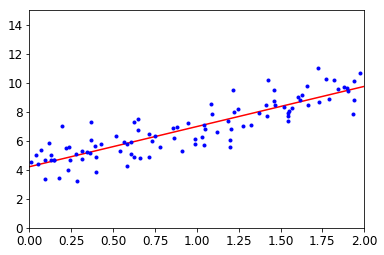

In [9]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# 완성!

# 경사 하강법

## 배치 경사 하강법

비용 함수를 최소화하기 위해 반복적으로 파라미터를 조정.

In [29]:
eta = 0.1
n_iteration = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iteration):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y )
    theta = theta - eta * gradients

In [30]:
theta # 배치 경사 하강법으로 구한 계수

array([[4.21509616],
       [2.77011339]])

In [12]:
theta_best # 정규방정식으로 구한 계수

array([[4.21509616],
       [2.77011339]])

## 확률 경사 하강법

X가 너무 많을 때 사용. 몇 개만 뽑아서 한다.